In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
df = pd.read_csv('day.csv')

In [52]:
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None

First few rows of the dataset:
   instant      dteday  season  yr  mnth  holiday  weekd

In [4]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

In [7]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [8]:
scaler = MinMaxScaler()
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [9]:
print("\nEncoded dataset:")
print(df_encoded.head())


Encoded dataset:
   instant     dteday      temp     atemp       hum  windspeed  casual  \
0        1 2018-01-01  0.355170  0.373517  0.828620   0.284606     331   
1        2 2018-01-02  0.379232  0.360541  0.715771   0.466215     131   
2        3 2018-01-03  0.171000  0.144830  0.449638   0.465740     120   
3        4 2018-01-04  0.175530  0.174649  0.607131   0.284297     108   
4        5 2018-01-05  0.209120  0.197158  0.449313   0.339143      82   

   registered   cnt  season_2  ...  holiday_1  weekday_1  weekday_2  \
0         654   985     False  ...      False      False      False   
1         670   801     False  ...      False      False      False   
2        1229  1349     False  ...      False       True      False   
3        1454  1562     False  ...      False      False       True   
4        1518  1600     False  ...      False      False      False   

   weekday_3  weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  \
0      False      False      Fals

In [ ]:
# Correlation analysis

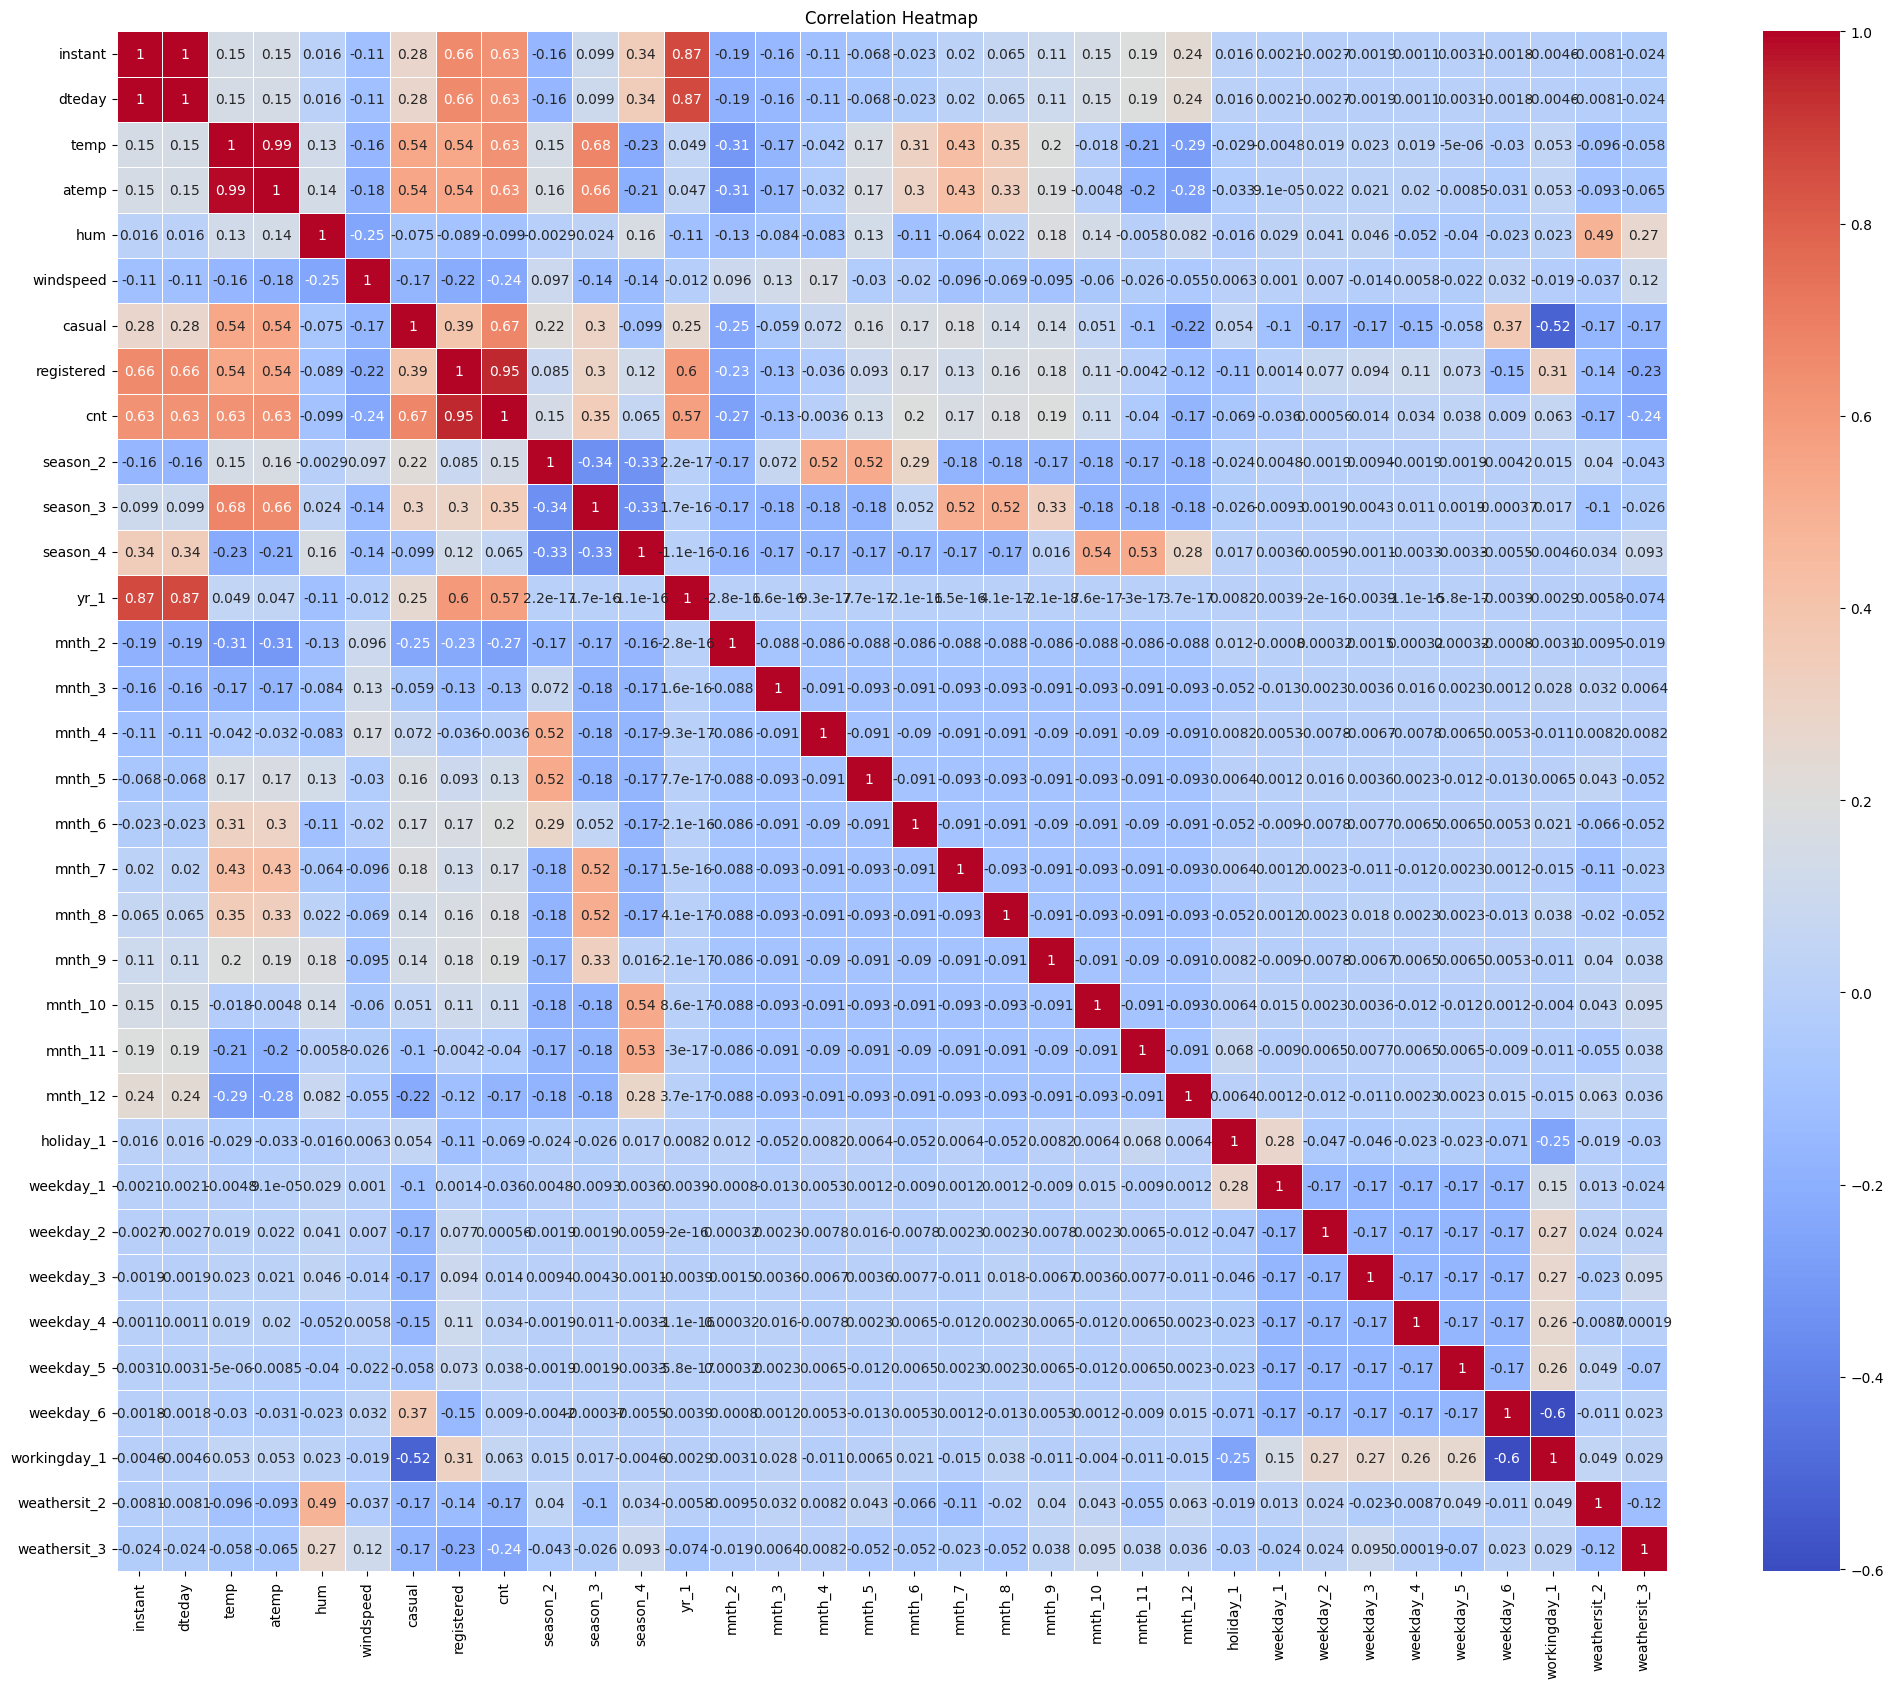

In [13]:
correlation = df_encoded.corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Pairplot for numerical variables

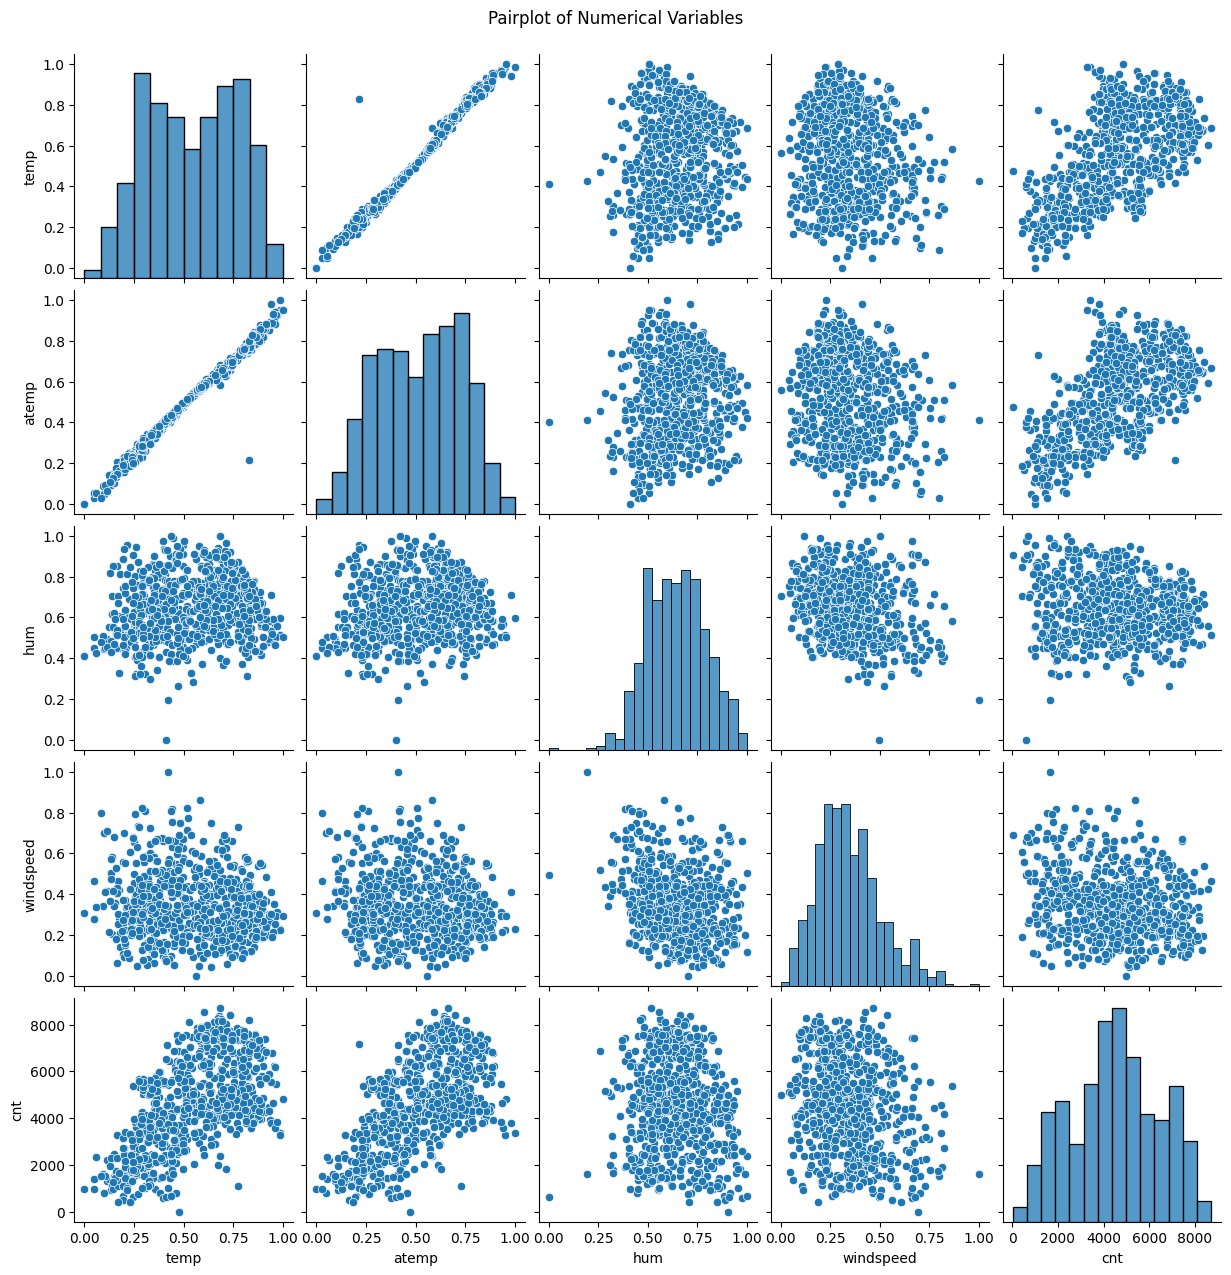

In [14]:
sns.pairplot(df_encoded[num_cols + ['cnt']])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

In [ ]:
# Box plots for categorical variables

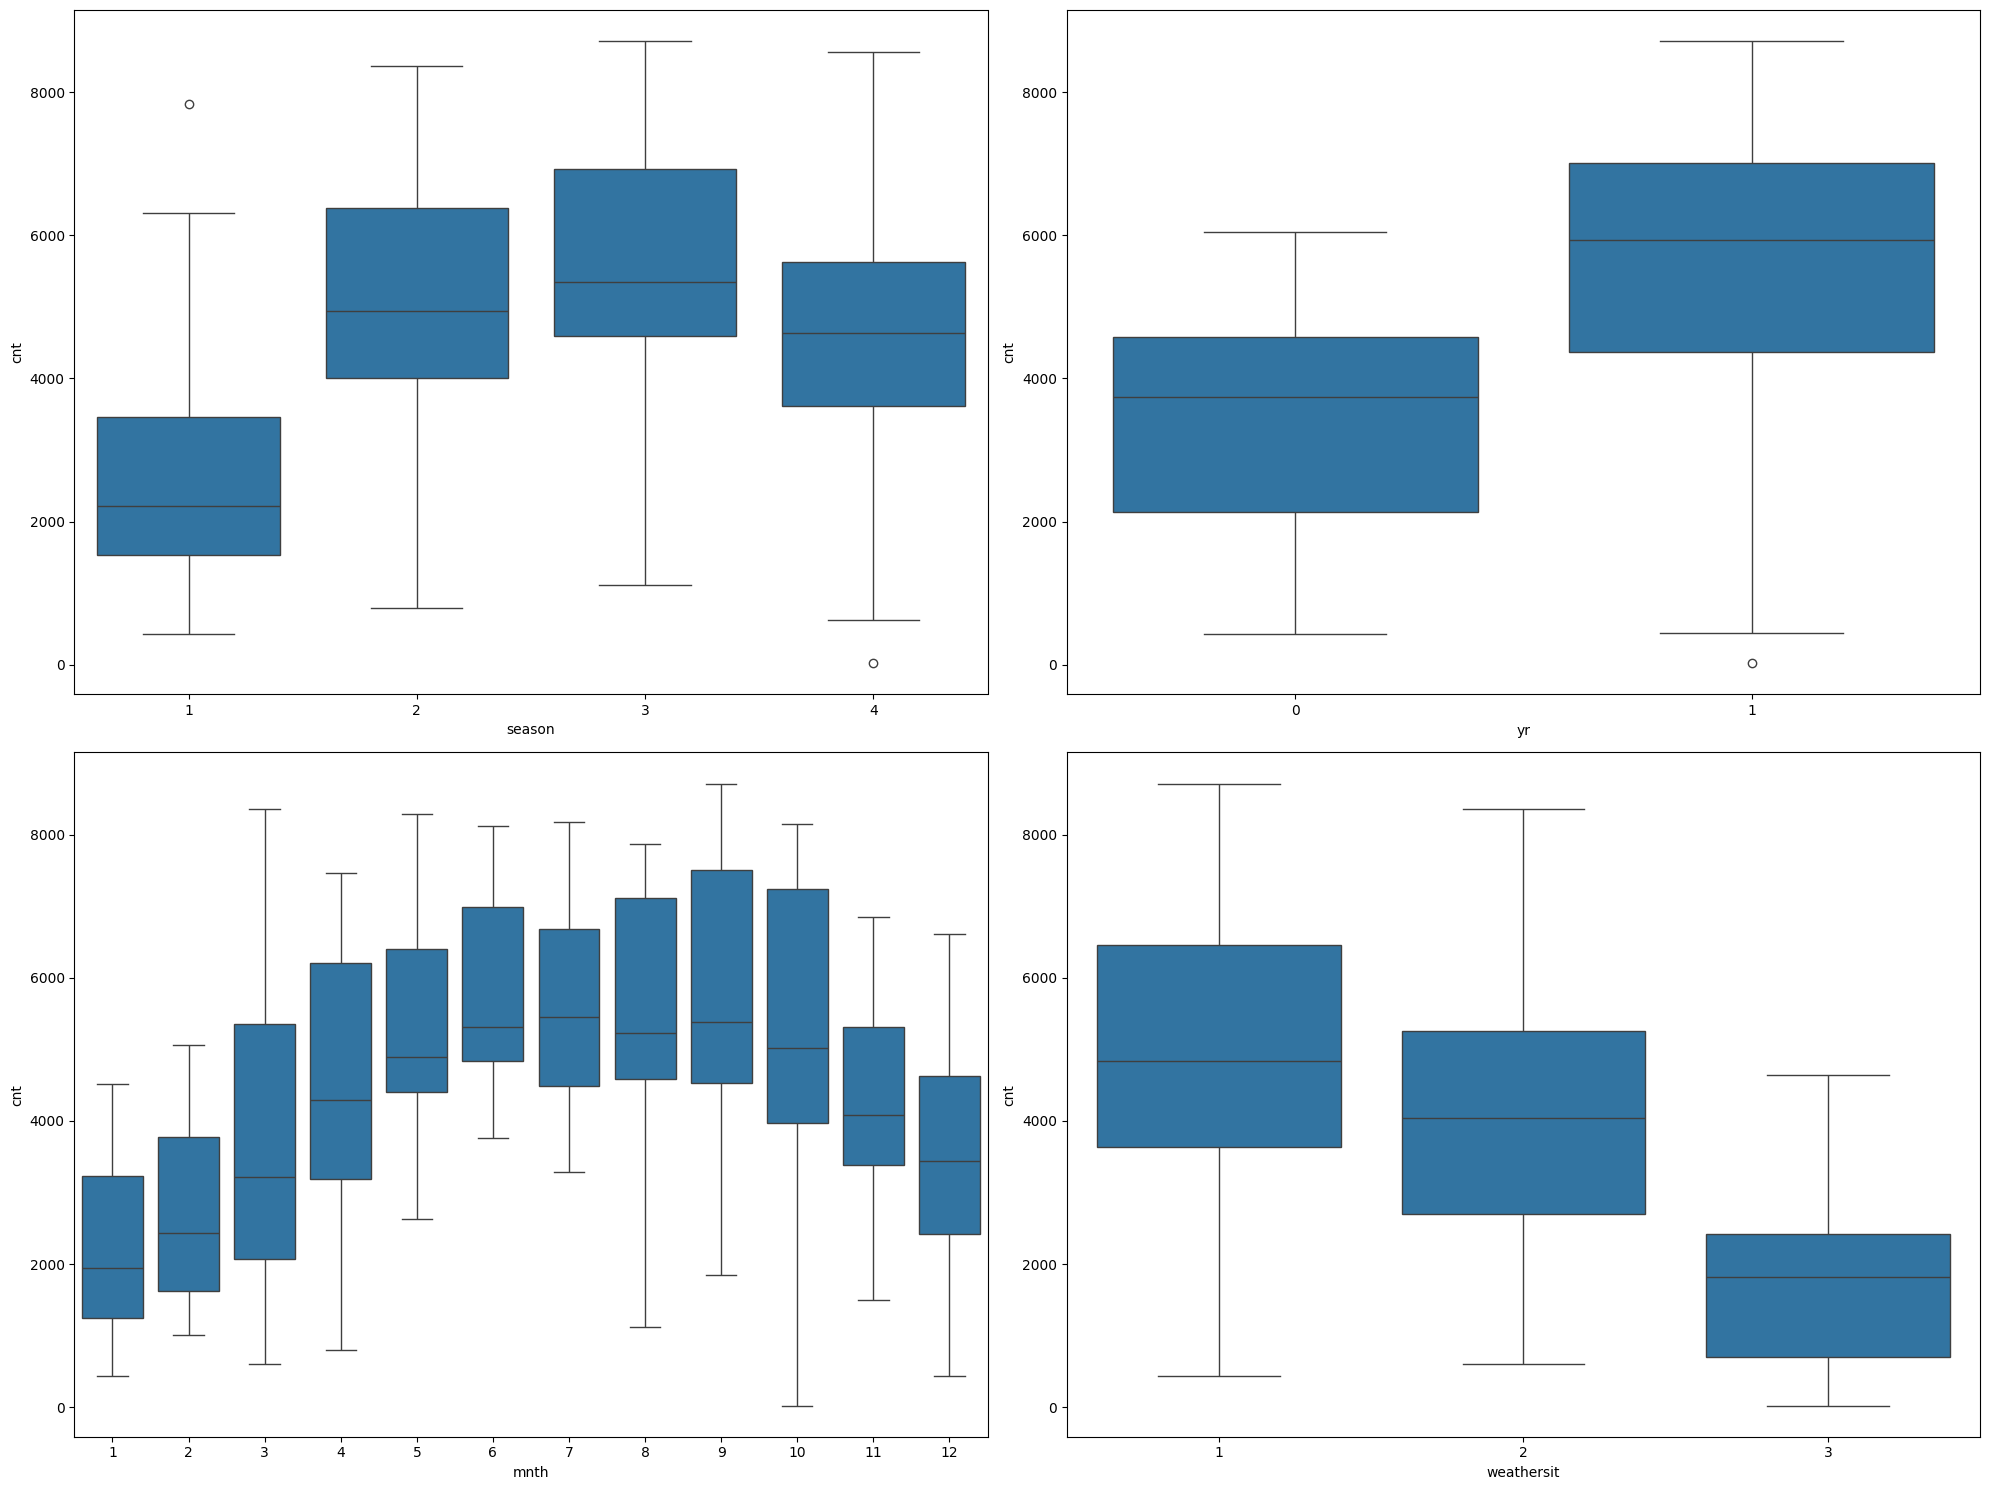

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(x='season', y='cnt', data=df, ax=axes[0, 0])
sns.boxplot(x='yr', y='cnt', data=df, ax=axes[0, 1])
sns.boxplot(x='mnth', y='cnt', data=df, ax=axes[1, 0])
sns.boxplot(x='weathersit', y='cnt', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [ ]:
#Preparing the data for modeling

In [16]:
X = df_encoded.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'], axis=1)
y = df_encoded['cnt']

In [31]:
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)

print("Data types after conversion:")
print(X.dtypes)

Data types after conversion:
temp            float64
atemp           float64
hum             float64
windspeed       float64
season_2          int64
season_3          int64
season_4          int64
yr_1              int64
mnth_2            int64
mnth_3            int64
mnth_4            int64
mnth_5            int64
mnth_6            int64
mnth_7            int64
mnth_8            int64
mnth_9            int64
mnth_10           int64
mnth_11           int64
mnth_12           int64
holiday_1         int64
weekday_1         int64
weekday_2         int64
weekday_3         int64
weekday_4         int64
weekday_5         int64
weekday_6         int64
workingday_1      int64
weathersit_2      int64
weathersit_3      int64
dtype: object


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Building Initial OLS model

In [33]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     106.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.46e-203
Time:                        16:53:34   Log-Likelihood:                -4712.0
No. Observations:                 584   AIC:                             9482.
Df Residuals:                     555   BIC:                             9609.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1656.1908    263.136      6.294   

In [ ]:
#performing RFE

In [35]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [36]:
selected_features = X_train.columns[rfe.support_]

In [37]:
X_train_rfe = sm.add_constant(X_train[selected_features])
final_model = sm.OLS(y_train, X_train_rfe).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     193.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          6.69e-212
Time:                        16:56:58   Log-Likelihood:                -4725.0
No. Observations:                 584   AIC:                             9482.
Df Residuals:                     568   BIC:                             9552.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1694.6244    246.994      6.861   

In [38]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(len(X_train_rfe.columns))]
print(vif_data)

         feature         VIF
0          const   55.553384
1           temp  186.541109
2          atemp  181.811925
3            hum    1.953668
4      windspeed    1.260382
5       season_2    2.952389
6       season_3    5.708702
7       season_4    3.068988
8           yr_1    1.038075
9         mnth_9    1.233828
10       mnth_11    1.723542
11       mnth_12    1.326726
12     weekday_6    1.541297
13  workingday_1    1.563811
14  weathersit_2    1.608387
15  weathersit_3    1.357966


In [39]:
X_test_rfe = sm.add_constant(X_test[selected_features])
y_pred = final_model.predict(X_test_rfe)

In [40]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
print(f"R-squared score on test set: {r2_test}")

R-squared score on test set: 0.8514412162082146


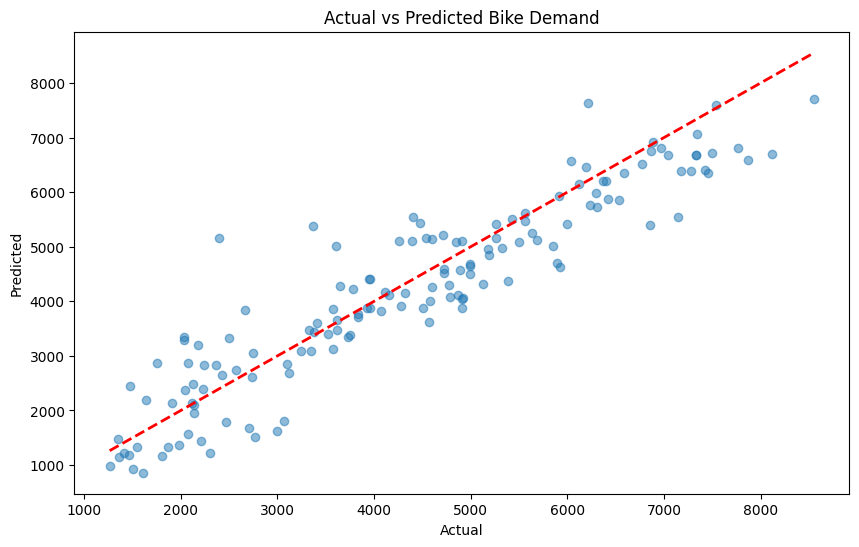

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Bike Demand")
plt.show()

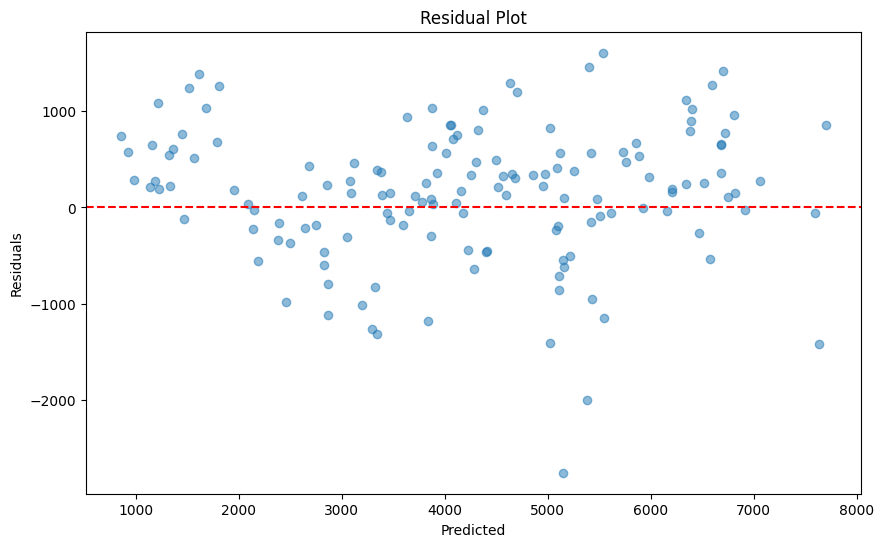

In [42]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

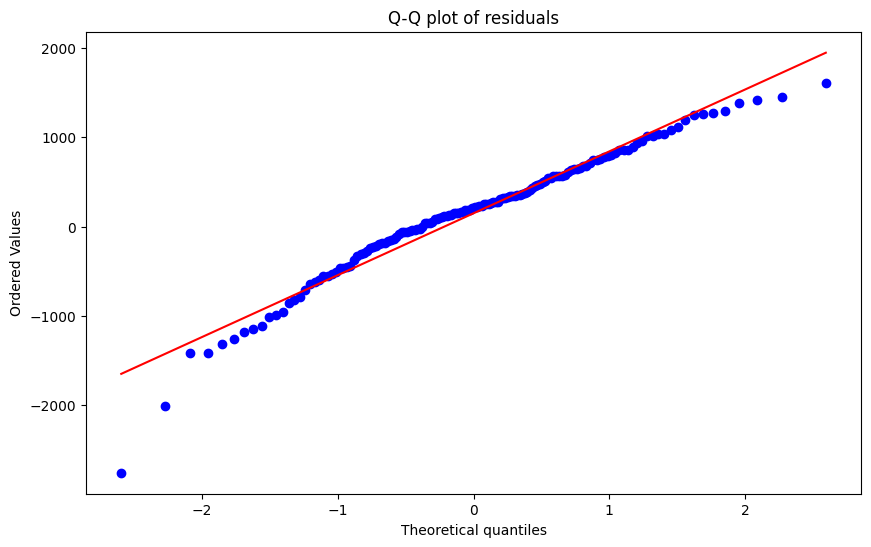

In [43]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q plot of residuals")
plt.show()